КЛАСТЕРИЗАЦИЯ
Алгоритмы кластеризации нацелены на то, чтобы найти, исходя из свойств данных, оптимальное разбиение или дискретную маркировку групп точек.


Метод k-средних
В библиотеке Scikit-Learn имеется множество алгоритмов кластеризации. Рассмотрим алгоритм кластеризации 
методом k-средних (k-means clustering), реализованный в классе sklearn.cluster.KMeans. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # для стилизации графиков
import numpy as np

Алгоритм методв k-средних выполняет поиск заранее заданного количества кластеров в немаркированном многомерном наборе данных. 
Два допущения составляют основу модели метода k-средних.
1.  «Центр кластера» — арифметическое среднее всех точек, относящихся к этому кластеру.
2. Каждая точка ближе к центру своего кластера, чем к центрам других кластеров.
Максимизация математического ожидания (EM) 

Подход максимизации математического ожидания состоит в следующей процедуре:
1. Выдвигаем гипотезу о центрах кластеров.
2. Повторяем до достижения сходимости:
     E-шаг(шаг ожидания (expectation)): приписываем точки к ближайшим центрам кластеров;
     M-шаг(шаг максимизации (maximization)): задаем новые центры кластеров в соответствии со средними значениями.
E-шаг актуализаирует математическое ожидание того, к каким кластерам относятся точки. 
M-шаг осуществляет максимизацию некоторой целевой функции, описывающей расположения центров кластеров. В таком случае максимизация достигается путем простого усреднения данных в кластере

Cгенерируем двумерный набор данных, содержащий четыре отдельных «пятна». 

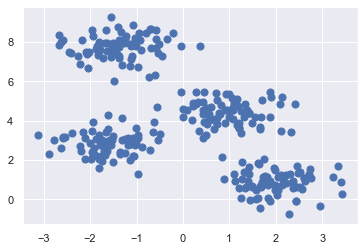

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Реализация метода k средних используя алгоритм приведенный выше с максимизацией математического ожидания:

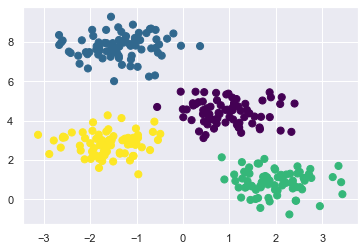

In [4]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)# 1. Выбираем кластеры случайным образом
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers) # 2a. Присваиваем метки в соответствии с ближайшим центром
        new_centers = np.array([X[labels == i].mean(0) # 2b. Находим новые центры, исходя из средних значений точек
                                      for i in range(n_clusters)]) # 2c. Проверяем сходимость
        if np.all(centers == new_centers):
             break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4) #Количество кластеров следует выбирать заранее.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Кластеризация немаркированных данных может быть выполнена с помощью модуля sklearn.cluster.
Метод k средних реализован в классе sklearn.cluster.KMeans
Подробнее о задании параметров https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

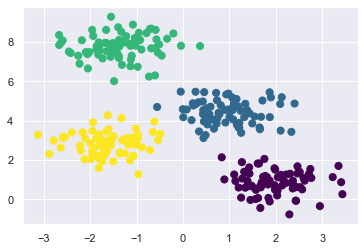

In [5]:
from sklearn.cluster import KMeans

labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

DBSCAN
Это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями]), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко). 

Алгоритм DBSCAN может быть разложен на следующие шаги:

1. Находим точки в epsilon  окрестности каждой точки и выделяем основные точки которые должны образовывать плотную область minPts соседями.
2. Находим связные компоненты основных точек на графе соседей, игнорируя все неосновные точки.
3. Назначаем каждую неосновную точку, ближайшему кластеру, если кластер является epsilon -соседним, в противном случае считаем точку шумом.

Более подробно о настройки переметров метода sklearn.cluster.DBSCANDBSCAN  можно прочитать https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

Используя make_blobs генерируем 4 кластера. (make_blobs генерирует изотропные (сферические) гауссовы капли)

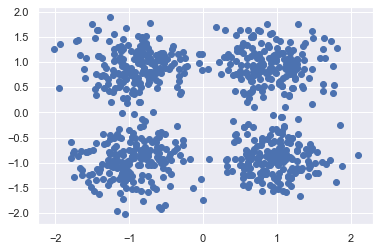

In [6]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


centers = [[1, 1], [-1, -1], [1, -1],[-1, 1]]
X, labels_true = make_blobs( n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

# Визуализируем результаты
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Предполагаемое количество кластеров: 4
Предполагаемое количество точек шума: 110


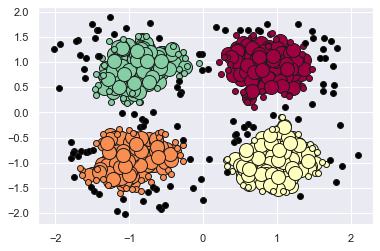

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.2, min_samples=10).fit(X)
labels = db.labels_

# Количество кластеров в метках, игнорируя шум, если он присутствует.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Предполагаемое количество кластеров: %d" % n_clusters_)
print("Предполагаемое количество точек шума: %d" % n_noise_)

# Визуализируем результаты 
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Точки соответствующие шуму выделяем черным цветом
        col = [0, 0, 0, 1]
 
    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot( xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.show()

